# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

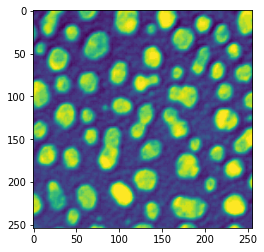

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')
blobs = cle.push(image)

cle.imshow(blobs)

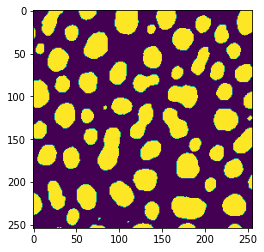

In [3]:
binary = cle.threshold_otsu(blobs)

cle.imshow(binary)

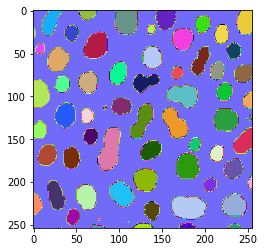

In [4]:
labels = cle.connected_components_labeling_box(binary)

cle.imshow(labels, labels=True)

# Quantitative maps a.k.a. parametric images
## Pixel count map

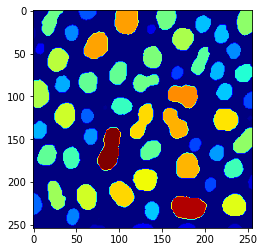

In [5]:
pixel_count_map = cle.label_pixel_count_map(labels)

cle.imshow(pixel_count_map, color_map='jet')

# Mean/min/max intensity map

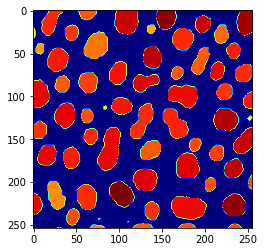

In [6]:
mean_intensity_map = cle.label_mean_intensity_map(blobs, labels)

cle.imshow(mean_intensity_map, color_map='jet')

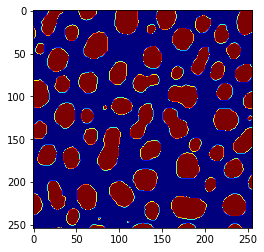

In [7]:
minimum_intensity_map = cle.label_minimum_intensity_map(blobs, labels)
cle.imshow(minimum_intensity_map, color_map='jet')

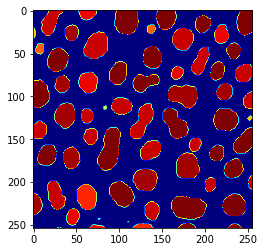

In [8]:
maximum_intensity_map = cle.label_maximum_intensity_map(blobs, labels)
cle.imshow(maximum_intensity_map, color_map='jet')